Calibration line: Moisture (%) = -0.000440 * Sensor Reading + 9.2814


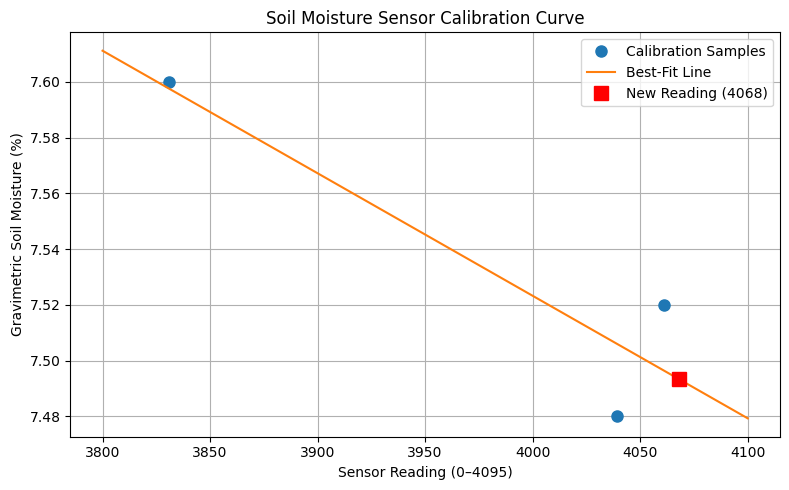

For a new sensor reading of 4068, the estimated gravimetric soil moisture is 7.49%.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Calibration sensor readings and their corresponding measured moisture percentages
# (Selected from the provided dataset)
sensor_cal = np.array([4039, 3831, 4061])
moisture_cal = np.array([7.48, 7.6, 7.52])

# Perform linear regression to get the best-fit line (slope and intercept)
coeffs = np.polyfit(sensor_cal, moisture_cal, 1)
slope, intercept = coeffs
print(f"Calibration line: Moisture (%) = {slope:.6f} * Sensor Reading + {intercept:.4f}")

# Generate x values (sensor readings) for the fitted line over the sensor's range
x_fit = np.linspace(3800, 4100, 400)
y_fit = slope * x_fit + intercept

# Full sensor data from the time,value entries provided
sensor_data = np.array([
    4095, 4095, 4039, 4075, 4095, 3831, 4095, 4095, 4095,
    4061, 4093, 4095, 4092, 4095
])
# Compute the average sensor reading
new_reading = sensor_data.mean()
estimated_moisture = slope * new_reading + intercept

# Plot the calibration data points, best-fit line, and the new sensor reading
plt.figure(figsize=(8, 5))
plt.plot(sensor_cal, moisture_cal, 'o', label='Calibration Samples', markersize=8)
plt.plot(x_fit, y_fit, '-', label='Best-Fit Line')
plt.plot(new_reading, estimated_moisture, 's', color='red', 
         label=f'New Reading ({new_reading:.0f})', markersize=10)
plt.xlabel('Sensor Reading (0–4095)')
plt.ylabel('Gravimetric Soil Moisture (%)')
plt.title('Soil Moisture Sensor Calibration Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"For a new sensor reading of {new_reading:.0f}, the estimated gravimetric soil moisture is {estimated_moisture:.2f}%.")
